In [162]:
import os
import sys
home = os.environ["HOME"]
sys.path.append(home+'/bin/python')

Reading image.out


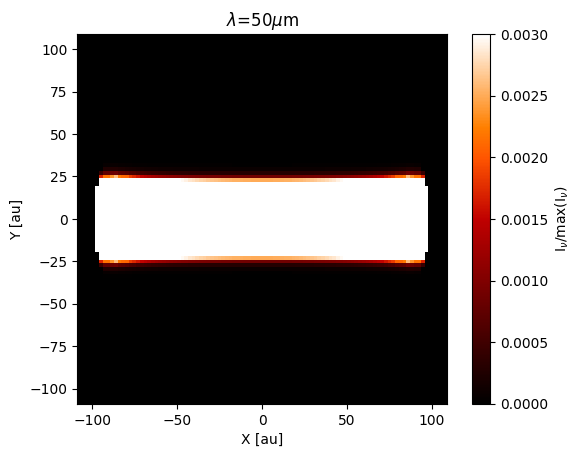

{'implot': <matplotlib.image.AxesImage at 0x44a6b4dc0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x46afc5b10>}

In [163]:
import matplotlib.pyplot as plt
from matplotlib import cm
from radmc3dPy import *
im=image.readImage()
image.plotImage(im,vmax=3e-3,au=True,cmap=cm.gist_heat)

In [164]:
import matplotlib.pyplot as plt
from matplotlib import cm
from radmc3dPy import image

im = image.readImage()

# Determine the number of wavelengths
num_lambdas = im.nwav

# Calculate grid size for subplots
rows = (num_lambdas + 3) // 4  # 4 images per row
cols = min(num_lambdas, 4)

# Create a figure with subplots for each wavelength
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create lambda values such that titles are representative, change as needed based off of terminal lambdarange values and nlam
lambda_values = [1 + i * ((9999 - 50) / 499) for i in range(500)]

# Plot each wavelength slice
for i in range(num_lambdas):
    ax = axes[i]
    im_data = im.image[:, :, i]

    # Adjust vmin and vmax based on the actual data range
    cax = ax.imshow(im_data, origin='lower', cmap=cm.gist_heat)

    # Set titles
    ax.set_title(f'Lambda {lambda_values[i]}')
    ax.set_xlabel('AU')
    ax.set_ylabel('AU')
    fig.colorbar(cax, ax=ax)

# Adjust layout to prevent overlap
plt.show()

Reading image.out


Reading amr_grid.inp
Reading dust_temperature.dat


Text(0, 0.5, 'T [K]')

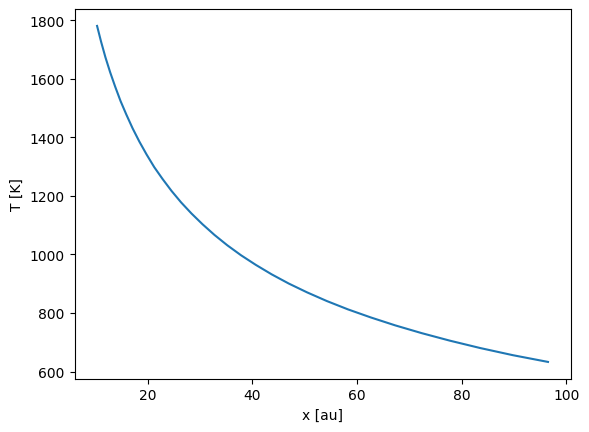

In [165]:
import matplotlib.pyplot as plt
from radmc3d_tools.simpleread import *
import radmc3d_tools.natconst as nc
tm = read_dusttemp()
plt.figure()
plt.plot(tm.grid.x/nc.au,tm.dusttemp[:,0,0])
plt.xlabel('x [au]')
plt.ylabel('T [K]')

Reading image.out


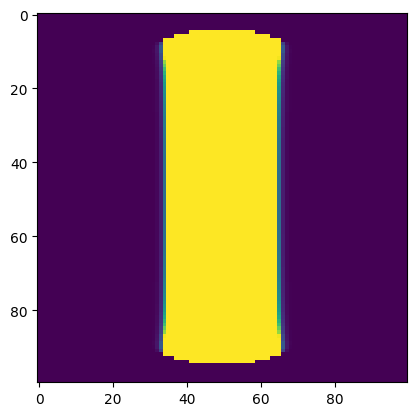

In [166]:
im = read_image()
plt.figure()
plt.imshow(im.image[:,:,0],vmax=3e-14)
plt.show()

(0.01, 10000.0, 1e-12, 0.1)

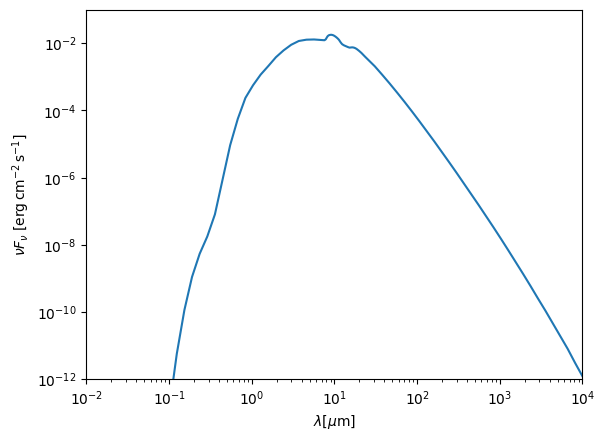

In [167]:
from radmc3dPy.analyze import *
s = readSpectrum()
plotSpectrum(s,xlg=True,ylg=True,micron=True)
plt.axis([1e-2,1e4,1e-12,1e-1])